# Data exploration


## Objective

- Create a table with a row per opportunity, an outcome variable and a set of features

1) Features can be opportunity / account attributes

2) A history of interactions between GC and the opportunity

----

## Set up env

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_rows', 500)

## Read in data

In [2]:
opportunities_df = pd.read_csv("data/opportunities_lg.csv")

/usr/local/anaconda3/envs/gocardless_eda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,41,42,45,46,92,110,112,113,122,123,124,162,164,175,180,186,187,190,227,228,231,235,239) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Inspect

In [3]:
opportunities_df.shape

(21329, 243)

In [4]:
opportunities_df.head()

,opportunity_id,opportunity_owner_id,account_id,parent_account_id,previous_opportunity_id,salesforce_organisation_id,onboarding_primary_organisation_id,integration_for_payment_creation,onboarding_id,customer_success_id,campaign_id,source_bucket,business_unit,opportunity_type,opportunity_stage_name,opportunity_stage_name_simplified,opportunity_stage_number,opportunity_won,opportunity_closed,team,channel,country,country_code,contract_length_years,commitment_period,segment,merchant_partner,source,source_detail,salesforce_currency,commission_model,opportunity_name,opportunity_owner_name,opportunity_owner_is_active,integration_for_payment_creation_name,onboarding_analyst,onboarding_complete,onboarding_stage,onboarding_ref,onboarding_use_case,onboarding_ramp_up_method,onboarding_has_custom_payment_pages_required,onboarding_has_custom_notifications_required,is_onboarding_form_completed,has_onboarding_payout_email_been_sent,next_steps,implementation_t_shirt_size,time_to_sign,opportunity_created_by_role,opportunity_created_by,opportunity_created_by_division,owner_role,opportunity_owner_division,use_case,account_name,customer_success_intake,customer_success_owner,account_stage,has_success_plan_link,annual_revenue_db,vertical,subvertical,email_domain,audience,account_owner_user,champion,economic_buyer,decision_maker,business_user__c,last_share_of_wallet,days_from_last_share_of_wallet,channel_detail,legacy_exclude_opp,closed_lost_reason,legacy_disqualified_opp,pipeline_created_by,pipeline_created_by_division,pipeline_created_by_role,record_type,exchange_rate,probability,forecast_category_name,next_step,has_contacted_sales,has_contacted_via_chatbot,has_called_sales,ramp_up_method,is_multischeme,schemes,manual_support_package_override,original_opportunity_support_package,support_package,renewal_forecast_category_reason,renewal_forecast_reason,is_borderless_opportunity,sao_count,pipeline_source,pipeline_business_unit,sales_cycle,has_partner_account_record,is_support_schedule_requested,has_support_package_discount_approved,is_land_and_expand,pipeline_created_by_growth_engine,pipeline_growth_engine,closed_by_growth_engine,opportunity_owner_growth_engine,growth_engine_account_current,growth_engine_account_at_opp_creation,closed_by_division,missing_feature_details,closed_lost_detail,recycled_reason_code,revision_reason_code,open_banking_pipeline,instant_1st_time_payments,merchant_transaction_volumes_acv,commitments_instant_bank_pay,ad_hoc_payments,verified_mandates,invoice_payments,open_banking_schemes,renewal_canx_closed_primary_reason,renewal_canx_closed_secondary_reason,is_new_funnel,max_stage_reached,total_acv_local,total_acv_gbp,total_tcv_local,total_tcv_gbp,total_gross_acv_local,total_gross_acv_gbp,previous_total_gross_acv_local,previous_total_gross_acv_gbp,total_finance_acv_local,total_finance_acv_gbp,gc_payments_acv_local,gc_payments_acv_gbp,gc_payments_tcv_local,gc_payments_tcv_gbp,gc_payments_gross_acv_local,gc_payments_gross_acv_gbp,gc_payments_finance_acv_local,gc_payments_finance_acv_gbp,success_acv_local,success_acv_gbp,success_tcv_local,success_tcv_gbp,success_gross_acv_local,success_gross_acv_gbp,success_finance_acv_local,success_finance_acv_gbp,assumed_acv_local,assumed_acv_gbp,support_package_acv_local,support_package_acv_gbp,support_package_gross_acv_local,support_package_gross_acv_gbp,support_package_finance_acv_local,support_package_finance_acv_gbp,csm_acv_renewal_forecast_acv_local,csm_acv_renewal_forecast_acv_gbp,success_plus_break_clause_period,is_poc_opportunity,market_country,share_of_wallet,share_of_wallet_levers,discount_type_applied,onboarding_status_lost_cancelled_date,attribution_touchpoint_count,sales_attribution_touchpoint_count,marketing_attribution_touchpoint_count,customer_success_stage,has_kick_off_meeting_scheduled,has_success_plan_signoff,customer_success_record_notes,opportunity_created_from_account_stage,days_since_last_hie,last_hie_meeting_type,days_to_next_hie,next_hie_meeting_type,days_since_last_kick_

In [5]:
list(opportunities_df.columns)

['opportunity_id',
 'opportunity_owner_id',
 'account_id',
 'parent_account_id',
 'previous_opportunity_id',
 'salesforce_organisation_id',
 'onboarding_primary_organisation_id',
 'integration_for_payment_creation',
 'onboarding_id',
 'customer_success_id',
 'campaign_id',
 'source_bucket',
 'business_unit',
 'opportunity_type',
 'opportunity_stage_name',
 'opportunity_stage_name_simplified',
 'opportunity_stage_number',
 'opportunity_won',
 'opportunity_closed',
 'team',
 'channel',
 'country',
 'country_code',
 'contract_length_years',
 'commitment_period',
 'segment',
 'merchant_partner',
 'source',
 'source_detail',
 'salesforce_currency',
 'commission_model',
 'opportunity_name',
 'opportunity_owner_name',
 'opportunity_owner_is_active',
 'integration_for_payment_creation_name',
 'onboarding_analyst',
 'onboarding_complete',
 'onboarding_stage',
 'onboarding_ref',
 'onboarding_use_case',
 'onboarding_ramp_up_method',
 'onboarding_has_custom_payment_pages_required',
 'onboarding_ha

In [6]:
# N opportunities
opportunities_df.opportunity_id.nunique()

21329

### Explore categoricals

#### Opportunity types and stages

In [7]:
# Opportunity type
opportunities_df['opportunity_type'].value_counts(dropna=False)

New             15618
Renewal          3304
Conversion       1429
Upsell            728
Cancellation      136
Expansion          84
Downsell           30
Name: opportunity_type, dtype: int64

In [8]:
# opportunity_stage_name
opportunities_df['opportunity_stage_name'].value_counts(dropna=False)

8. Closed Lost               6684
7. Closed Won                4896
1. Discovery                 1903
11. Lost                     1885
10. Ramped                   1662
12. Disqualified             1471
8. Closed - Disqualified      634
8. Closed - Recycled          528
0. SDR Qualified              364
Live - Self-Serve             324
3. Collaborate                164
Closed Won                    147
9. Taking Payments            145
2. Qualify                    140
13. Churned                    91
4. Confirm                     76
5. Negotiation                 57
7. Setup                       43
0. Revision                    41
6. Signature                   32
8. Minimum Commit Started      29
7. Closed Lost                  7
Closed Lost                     6
Name: opportunity_stage_name, dtype: int64

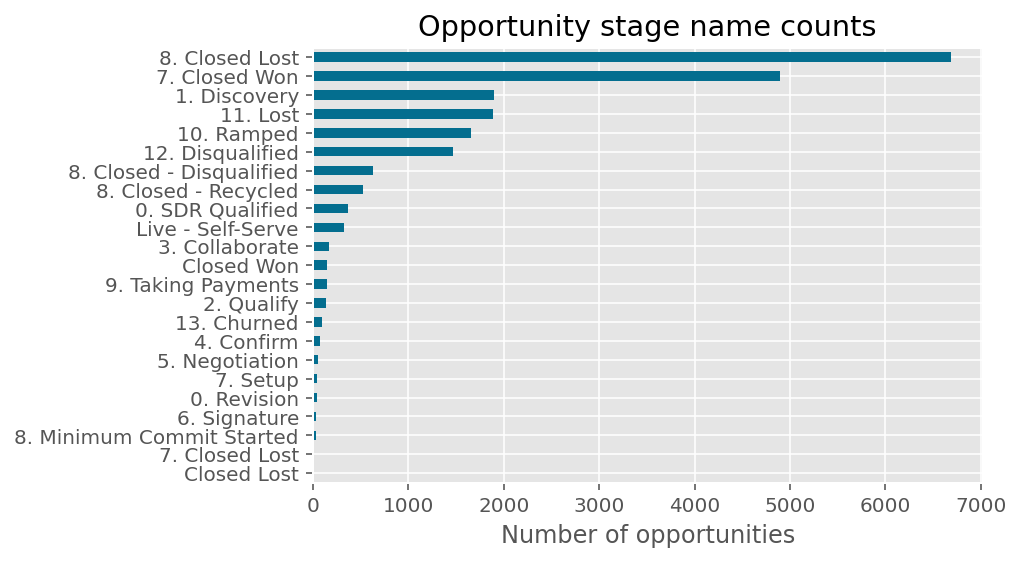

In [9]:
fig, ax = plt.subplots()
opportunities_df['opportunity_stage_name'].value_counts(dropna=False).sort_values().plot(kind = 'barh', color="#046E8F", ax=ax)
ax.set_xlabel("Number of opportunities")
plt.title("Opportunity stage name counts")
plt.show();

In [10]:
# Focus on closed lost vs. closed won
closed_opps_df = opportunities_df[opportunities_df['opportunity_stage_name'].isin(['8. Closed Lost', '7. Closed Won'])]

In [11]:
# Why is 'closed won' so high?

In [12]:
closed_opps_df.shape

(11580, 243)

In [13]:
closed_opps_df['opportunity_stage_name'].value_counts() / closed_opps_df.shape[0]

8. Closed Lost   0.577
7. Closed Won    0.423
Name: opportunity_stage_name, dtype: float64

#### Team

In [14]:
# Team
closed_opps_df['team'].value_counts()

Sales                     8114
Customer                  1612
Marketing                  585
Customer Success Group     449
Partnerships               282
Customer Success            91
Name: team, dtype: int64

In [15]:
# channel - doesn't look useful
# closed_opps_df[['team', 'channel']].value_counts()
closed_opps_df.groupby(['team', 'channel']).size()

team                    channel                            
Customer                End Customer User                        3
                        GC Salesperson                           3
                        Legacy Unknown                           1
                        Non Partner Recommendation               1
                        Not yet known                           10
                        Other                                    1
                        Web Search (Google, Bing Yahoo etc)      1
Customer Success        GC Salesperson                           1
                        Legacy Unknown                           1
                        Not yet known                           12
Customer Success Group  End Customer User                        1
Marketing               Direct Mail                              1
                        Email                                    7
                        End Customer User                       25
  

#### Country

In [16]:
# Country
closed_opps_df.groupby(['opportunity_stage_name', 'country']).size().to_frame('n').sort_values(by=['opportunity_stage_name', 'n'], ascending=False)

n
opportunity_stage_name country                         
8. Closed Lost         United Kingdom              4334
                       France                       810
                       Germany                      441
                       United States                331
                       Australia                    329
                       Spain                        123
                       New Zealand                   83
                       Ireland                       63
                       Canada                        33
                       Netherlands                   26
                       Austria                       16
                       Italy                         16
                       Sweden                        15
                       Belgium                       14
                       Denmark                       10
                       Portugal                       6
                       European Union                 5
                       Switzerland                    4
                       Malta                          3
                       United States of America       3
                       Guadeloupe                     2
                       Belarus                        1
                       Czech Republic                 1
                       Finland                        1
                       French Guiana                  1
                       Ghana                          1
                       Greece                         1
                       Israel                         1
                       Luxembourg                     1
                       Mayotte                        1
                       Monaco                         1
                       Norway                         1
                       Reunion                        1
                       Réunion                        1
                       South Africa                   1
                       UK                             1
                       United Arab Emirates           1
7. Closed Won          United Kingdom              3744
                       France                       500
                       Germany                      204
                       Australia                    121
                       Spain                         83
                       United States                 65
                       New Zealand                   40
                       Ireland                       39
                       Italy                         18
                       Canada                        17
                       Netherlands                   17
                       Denmark                        9
                       Malta                          6
                       Sweden                         6
                       Austria                        5
                       Belgium                        4
                       Switzerland                    4
                       Guadeloupe                     2
                       Norway                         2
                       United States of America       2
                       European Union                 1
                       Finland                        1
                       Gibraltar                      1
                       Poland                         1
                       Portugal                       1
                       Réunion                        1
                       Saint Martin (French part)     1

#### Contract length

* What does it mean to have contract length if lost?

In [17]:
# contract length - why do lost have contract length?
closed_opps_df.groupby(['opportunity_stage_name', 'contract_length_years'], dropna=False).size().to_frame('n').sort_values(by=['opportunity_stage_name', 'n'], ascending=False)

n
opportunity_stage_name contract_length_years      
8. Closed Lost         NaN                    4412
                       1.000                  1607
                       3.000                   446
                       2.000                   208
                       0.000                     6
                       5.000                     3
                       4.000                     2
7. Closed Won          1.000                  3094
                       NaN                     806
                       3.000                   645
                       2.000                   302
                       0.000                    35
                       4.000                     8
                       5.000                     6

#### segment

In [18]:
# segment - lots of NA for both groups
closed_opps_df.groupby(['opportunity_stage_name', 'segment'], dropna=False).size().to_frame('n').sort_values(by=['opportunity_stage_name', 'n'], ascending=False)

n
opportunity_stage_name segment                           
8. Closed Lost         NaN                           4116
                       Traditional DD Subscriptions   713
                       New DD Subscriptions           629
                       Small Invoicers                532
                       New DD Invoicers               207
                       Traditional DD Invoicers       207
                       Invoicing Scale Ups            137
                       Instalments                     75
                       Small Subscriptions             68
7. Closed Won          NaN                           3026
                       Traditional DD Subscriptions   505
                       New DD Subscriptions           405
                       Small Invoicers                405
                       Traditional DD Invoicers       178
                       New DD Invoicers               142
                       Invoicing Scale Ups             93
                       Small Subscriptions             91
                       Instalments                     51

#### opportunity_owner_division

In [19]:
# opportunity_owner_division
closed_opps_df['opportunity_owner_division'].value_counts(dropna=False)

UK & Other        5990
Global            2070
France            1280
ANZ                613
DACH               565
North America      500
NaN                464
Small Business      96
Uk & Other           2
Name: opportunity_owner_division, dtype: int64

#### merchant_partner

* In the previous analysis they said 'partner' was an important features in predicting conversion probability...this doesn't look large enough though? What is 'partner'?

In [20]:
# merchant_partner
closed_opps_df['merchant_partner'].value_counts(dropna=False)

Merchant    11193
Partner       387
Name: merchant_partner, dtype: int64

#### commission_model

* VRA vs. CRA - think this makes sense? 
* Should we focus on just one of them?

In [21]:
# commission_model
closed_opps_df.groupby(['opportunity_stage_name', 'commission_model'], dropna=False).size()

opportunity_stage_name  commission_model
7. Closed Won           CRA                 3944
                        VRA                  731
                        NaN                  221
8. Closed Lost          CRA                 5235
                        VRA                 1330
                        NaN                  119
dtype: int64

#### Account stage

* Not sure what this is

In [22]:
# account_stage
closed_opps_df['account_stage'].value_counts(dropna=False)

NaN                    7251
CS Managed - SB        2962
CS Managed - Ent&MM     828
Churned - SB            449
Churned - Ent&MM         83
CS_Watchlist              4
CS Reactive               3
Name: account_stage, dtype: int64

#### Revenue, employees, size

* The revenue numbers look suspiciously round

In [23]:
# annual_revenue_db - account level
closed_opps_df['annual_revenue_db']

6026         4,552,770.000
6027         5,000,000.000
6028         1,776,805.000
6029         5,000,000.000
6030        75,000,000.000
               ...        
17829       40,988,000.000
17830    5,000,000,000.000
17831      175,000,000.000
17832   10,000,000,001.000
17833          273,056.000
Name: annual_revenue_db, Length: 11580, dtype: float64

In [24]:
avg_revenue = closed_opps_df.groupby("account_id")["annual_revenue_db"].mean()

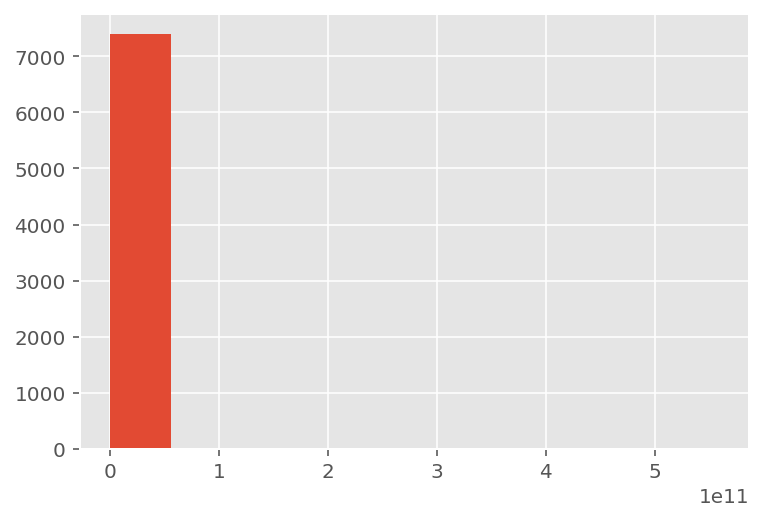

In [25]:
avg_revenue.hist();

In [26]:
avg_revenue = avg_revenue[avg_revenue < 1e9]

In [27]:
len(avg_revenue)

7077

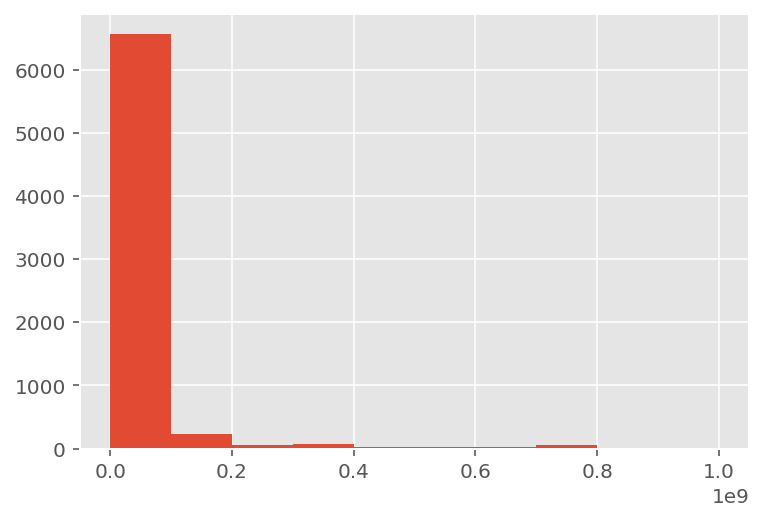

In [28]:
avg_revenue.hist();

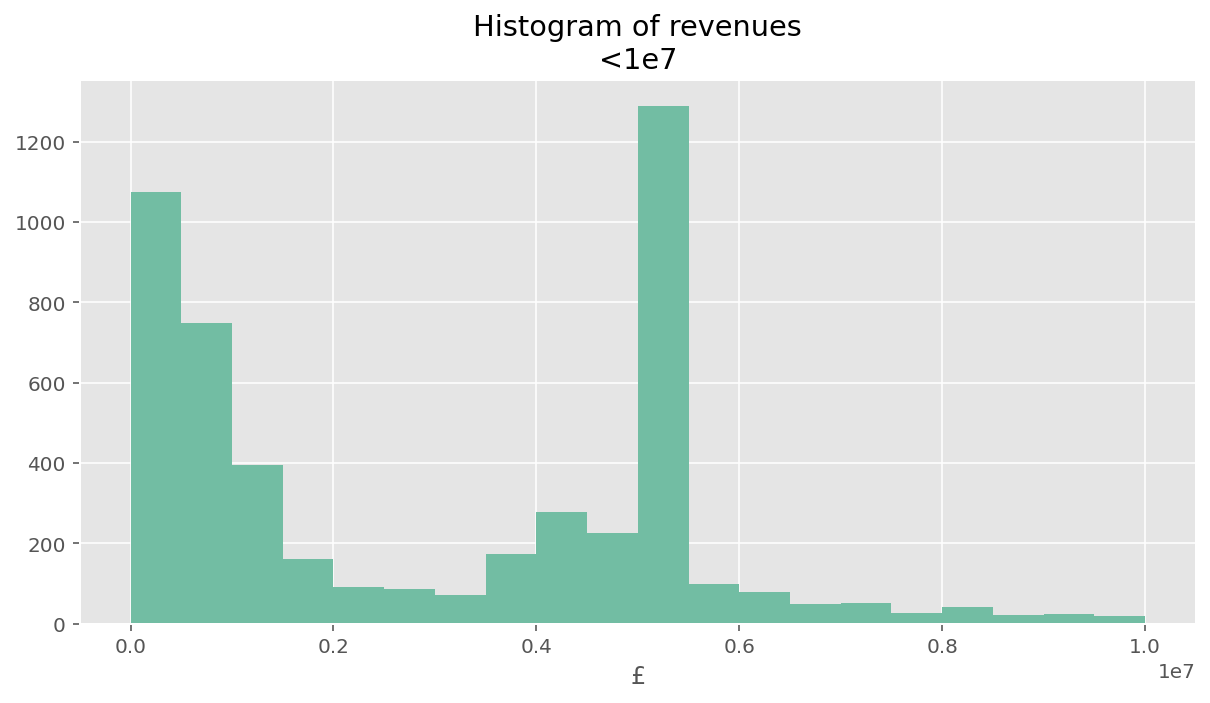

In [29]:
ax = avg_revenue[avg_revenue < 1e7].hist(bins=20, color="#72BDA3", figsize=(10, 5));
ax.set(title='Histogram of revenues\n<1e7')
ax.set_xlabel("£")
plt.show();

In [30]:
# Multiplying by FX
closed_opps_df['annual_revenue_db_conv'] = closed_opps_df['annual_revenue_db'] * closed_opps_df['exchange_rate']

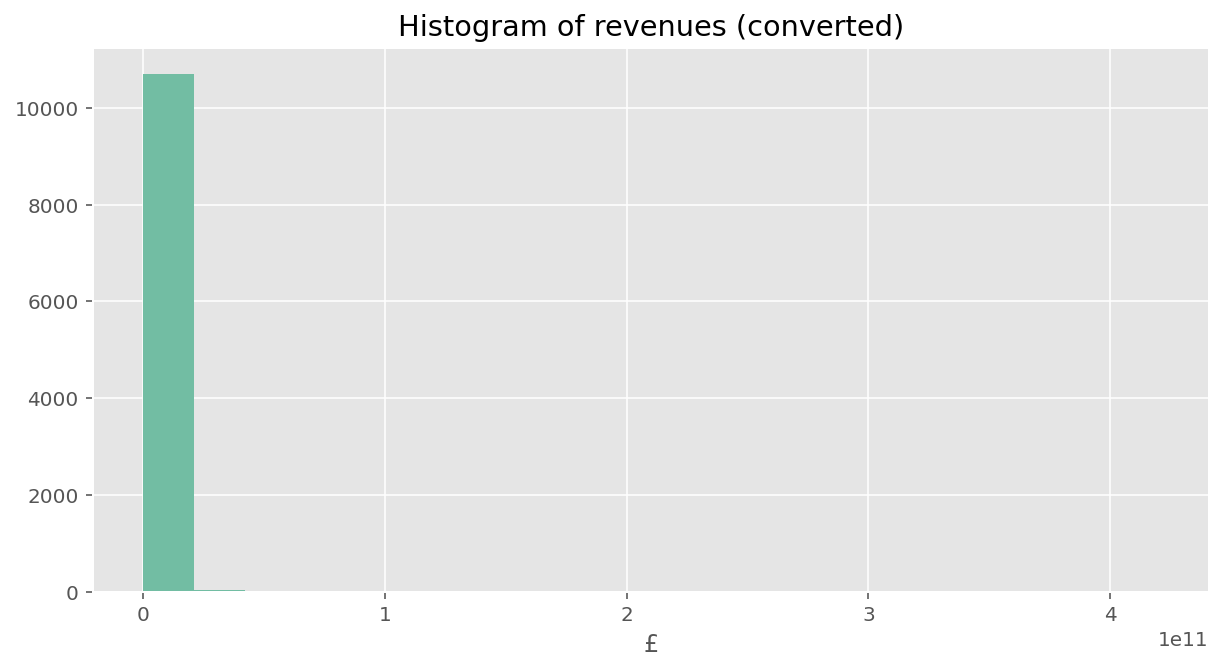

In [31]:
ax = closed_opps_df['annual_revenue_db_conv'].hist(bins=20, color="#72BDA3", figsize=(10, 5));
ax.set(title='Histogram of revenues (converted)')
ax.set_xlabel("£")
plt.show();

- Looks like random number entries?

In [32]:
avg_revenue.value_counts(dropna=False) / len(avg_revenue)

5,000,000.000     0.160
25,000,000.000    0.060
500,000.000       0.055
75,000,000.000    0.012
175,000,000.000   0.011
                   ... 
14,703,000.000    0.000
4,420,587.000     0.000
26,831,000.000    0.000
105,357.000       0.000
4,908,000.000     0.000
Name: annual_revenue_db, Length: 4214, dtype: float64

In [33]:
# revenue
print(f'mean revenue: {closed_opps_df.groupby("account_id")["annual_revenue_db"].mean().mean()}')
print(f'min revenue: {closed_opps_df.groupby("account_id")["annual_revenue_db"].mean().min()}')
print(f'max revenue: {closed_opps_df.groupby("account_id")["annual_revenue_db"].mean().max()}')

mean revenue: 623598687.2262458
min revenue: 0.0
max revenue: 559151000000.0


#### Contract values

In [34]:
# total_acv_local - customer value?
print(f'mean total_acv_local: {closed_opps_df.groupby("account_id")["total_acv_local"].max().mean()}')
print(f'min total_acv_local: {closed_opps_df.groupby("account_id")["total_acv_local"].max().min()}')
print(f'max total_acv_local: {closed_opps_df.groupby("account_id")["total_acv_local"].max().max()}')

mean total_acv_local: 14450.439026341704
min total_acv_local: -20028.0
max total_acv_local: 1188764.0


In [35]:
# closed_opps_df
closed_opps_df['total_acv_local'].head()

6026   14,244.000
6027    8,363.000
6028   99,700.000
6029   15,194.000
6030   41,242.000
Name: total_acv_local, dtype: float64

#### merchant_transaction_volumes_acv

In [36]:
# merchant_transaction_volumes_acv
closed_opps_df['merchant_transaction_volumes_acv'].isna().sum() / closed_opps_df.shape[0]

0.9207253886010363

#### Audience

* Not sure what this is

In [37]:
# audience
closed_opps_df['audience'].value_counts(dropna=False)

NaN                            10900
OB - High-fit sub verticals      426
OB - Expansion segments          254
Name: audience, dtype: int64

#### Ramp-up

* Not sure what this is

In [38]:
# ramp_up_method - what is this?
closed_opps_df['ramp_up_method'].value_counts(dropna=False)

Self-Ramp               5242
NaN                     4693
Bulk Change             1626
Internal Bulk Change      19
Name: ramp_up_method, dtype: int64

#### attribution_touchpoint_count

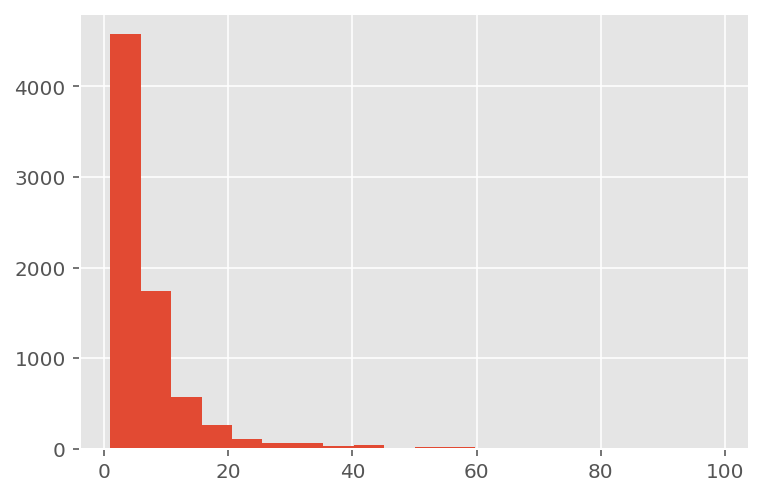

In [39]:
# attribution_touchpoint_count
closed_opps_df['attribution_touchpoint_count'][closed_opps_df['attribution_touchpoint_count'] < 100].hist(bins=20);

#### customer_success_stage

In [40]:
# customer_success_stage
closed_opps_df.groupby(['opportunity_stage_name', 'customer_success_stage'], dropna=False).size()

opportunity_stage_name  customer_success_stage 
7. Closed Won           CS Managed                  700
                        Internal Handover           123
                        Kick-off Meeting             26
                        Lost/Cancelled               11
                        Success Planning             86
                        Success Team Allocation      27
                        NaN                        3923
8. Closed Lost          CS Managed                   22
                        Lost/Cancelled              216
                        Success Team Allocation       9
                        NaN                        6437
dtype: int64

#### has_kick_off_meeting_scheduled

In [41]:
# What does this mean? 
closed_opps_df.groupby(['opportunity_stage_name', 'has_kick_off_meeting_scheduled'], dropna=False).size()

opportunity_stage_name  has_kick_off_meeting_scheduled
7. Closed Won           False                              406
                        True                               567
                        NaN                               3923
8. Closed Lost          False                              239
                        True                                 8
                        NaN                               6437
dtype: int64

#### days_since_last_hie

In [42]:
# days_since_last_hie?
closed_opps_df.groupby(['opportunity_stage_name', 'days_since_last_hie'], dropna=False).size().head()

opportunity_stage_name  days_since_last_hie
7. Closed Won           0.000                  2
                        1.000                  3
                        2.000                  6
                        3.000                  6
                        4.000                  4
dtype: int64

- mostly missing

#### Vertical

In [43]:
closed_opps_df['vertical'].value_counts(dropna=False)

Information Technology            2005
NaN                               1583
Services                          1559
Financial Services                1316
Communications and Media           883
Consumer Goods                     788
Health and Wellbeing               511
Property                           371
Membership Organisations           352
Education and Training             345
Energy                             339
Nonclassifiable Establishments     297
Insurance                          277
Transportation                     240
Government                         215
NGO                                164
Amusement and Recreation           122
Industrials                         88
Travel                              79
Materials                           43
Gambling                             3
Name: vertical, dtype: int64

In [44]:
closed_opps_df['subvertical'].value_counts(dropna=False).head(20)

NaN                                                 1937
Internet Software & Services                        1621
Business Services                                   1019
Accountancy                                          449
Diversified                                          364
Personal Services                                    301
Nonclassifiable Establishments                       297
System Software                                      285
Telecom                                              269
Banks                                                243
HoldCo                                               225
Colleges, Universities, and Professional Schools     221
Professional Bodies / Associations                   218
Estate Agents                                        212
Publishing                                           208
Food Related                                         201
Gyms                                                 195
Lending & Financing            

#### use_case

In [45]:
closed_opps_df['use_case'].value_counts(dropna=False)

NaN                          5414
Partner_Integration          2608
API                          1930
Dashboard                    1605
Partner Integration            17
Subscriptions                   3
Invoicing                       2
Integrated to InHouse App       1
Name: use_case, dtype: int64

#### Share of wallet

In [46]:
closed_opps_df['last_share_of_wallet'].value_counts(dropna=False).head()

NaN        10465
100.000      305
95.000        89
10.000        75
80.000        67
Name: last_share_of_wallet, dtype: int64

- what is this?
- vast maj nulls

In [47]:
closed_opps_df['days_from_last_share_of_wallet'].value_counts(dropna=False).head()

NaN        10465
786.000      506
197.000       78
192.000       38
529.000       29
Name: days_from_last_share_of_wallet, dtype: int64

In [48]:
closed_opps_df['share_of_wallet'].value_counts(dropna=False).head(15)

NaN        8717
0.000       993
100.000     858
50.000      224
90.000      159
80.000      115
75.000       92
20.000       52
70.000       45
10.000       43
60.000       43
30.000       41
95.000       40
40.000       32
25.000       25
Name: share_of_wallet, dtype: int64

In [49]:
closed_opps_df['share_of_wallet_levers'].value_counts(dropna=False).head()

NaN                          11504
Scheme Expansion                18
Existing Payees Expansion       12
Use Case Expansion              11
BU Expansion                    11
Name: share_of_wallet_levers, dtype: int64

#### record_type

In [50]:
closed_opps_df['record_type'].value_counts(dropna=False)

Emerging Opportunity             8079
Enterprise Opportunity           1475
Corporate Opportunity            1298
Partner Opportunity               387
SB Opportunity                    303
Global Enterprise Opportunity      33
Success+ Break Clause Opp           4
VRA Opportunity                     1
Name: record_type, dtype: int64

#### has_contacted_sales

In [51]:
closed_opps_df['has_contacted_sales'].value_counts(dropna=False)

False    9935
True     1645
Name: has_contacted_sales, dtype: int64

In [52]:
closed_opps_df['has_contacted_sales'].value_counts(dropna=False)

False    9935
True     1645
Name: has_contacted_sales, dtype: int64

In [53]:
closed_opps_df['has_contacted_via_chatbot'].value_counts(dropna=False)

False    11271
True       309
Name: has_contacted_via_chatbot, dtype: int64

#### schemes

In [54]:
closed_opps_df['schemes'].value_counts(dropna=False).head(10)

NaN                               4330
BACS                              3839
SEPA                              2178
BECS                               332
BACS;SEPA                          224
ACH                                141
BECS NZ                            101
BACS;SEPA;ACH                       60
BACS;SEPA;BECS;BECS NZ;PAD;ACH      28
BECS;BECS NZ                        23
Name: schemes, dtype: int64

#### support_package

In [55]:
closed_opps_df['support_package'].value_counts(dropna=False).head(10)

X             11115
Essentials      253
Enhanced        148
Premium          62
Standard          2
Name: support_package, dtype: int64

#### sao_count

- what is this?

In [56]:
closed_opps_df['sao_count'].value_counts(dropna=False).head(10)

1    9122
0    2458
Name: sao_count, dtype: int64

#### open_banking_pipeline

In [57]:
closed_opps_df['open_banking_pipeline'].value_counts(dropna=False).head(10)

False    11267
True       313
Name: open_banking_pipeline, dtype: int64

#### instant_1st_time_payments

In [58]:
closed_opps_df['instant_1st_time_payments'].value_counts(dropna=False).head(10)

False    11336
True       244
Name: instant_1st_time_payments, dtype: int64

#### merchant_transaction_volumes_acv

In [59]:
closed_opps_df['merchant_transaction_volumes_acv'].value_counts(dropna=False).head(10)

NaN           10662
0.000           124
6,000.000        87
5,000.000        25
4,800.000        14
1,000.000        14
12,000.000       13
500.000          13
10,000.000       12
4,000.000        12
Name: merchant_transaction_volumes_acv, dtype: int64

#### invoice_payments

In [60]:
closed_opps_df['invoice_payments'].value_counts(dropna=False)

False    11515
True        65
Name: invoice_payments, dtype: int64

#### commitments_instant_bank_pay

In [61]:
closed_opps_df['commitments_instant_bank_pay'].value_counts(dropna=False).head(10)

NaN          11326
0.000          137
1,000.000       13
200.000          9
100.000          5
500.000          5
50.000           4
600.000          4
10.000           4
3,000.000        3
Name: commitments_instant_bank_pay, dtype: int64

#### ad_hoc_payments

In [62]:
closed_opps_df['ad_hoc_payments'].value_counts(dropna=False).head(10)

False    11452
True       128
Name: ad_hoc_payments, dtype: int64

#### verified_mandates

In [63]:
closed_opps_df['verified_mandates'].value_counts(dropna=False).head(10)

False    11501
True        79
Name: verified_mandates, dtype: int64

#### Attribution

In [64]:
closed_opps_df['attribution_touchpoint_count'].value_counts(dropna=False).head(10)

NaN      3921
3.000    1217
4.000    1129
2.000     954
5.000     729
6.000     576
1.000     545
7.000     396
8.000     298
9.000     268
Name: attribution_touchpoint_count, dtype: int64

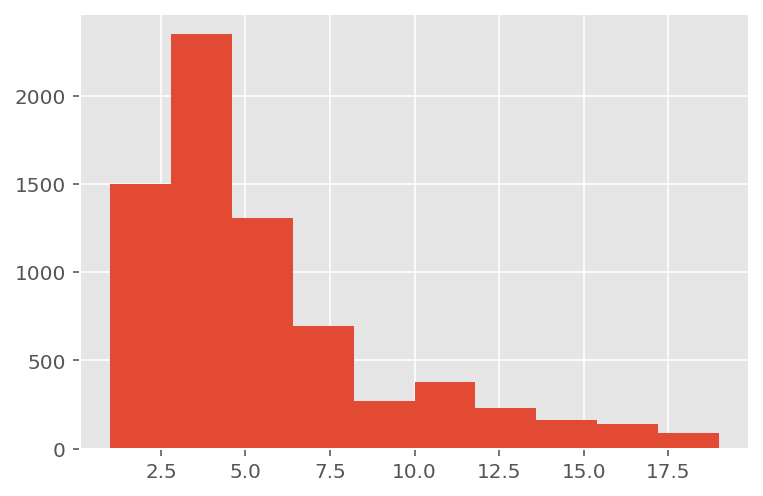

In [65]:
closed_opps_df['attribution_touchpoint_count'][closed_opps_df['attribution_touchpoint_count'] < 20].hist(bins=10);

In [66]:
closed_opps_df['sales_attribution_touchpoint_count'].value_counts(dropna=False).head(10)

0.000    7095
NaN      3921
1.000     439
2.000     102
3.000      17
4.000       5
5.000       1
Name: sales_attribution_touchpoint_count, dtype: int64

In [67]:
closed_opps_df['marketing_attribution_touchpoint_count'].value_counts(dropna=False).head(10)

NaN      3921
3.000    1215
4.000    1133
2.000     993
5.000     725
1.000     564
6.000     561
7.000     388
8.000     284
9.000     270
Name: marketing_attribution_touchpoint_count, dtype: int64

#### cm_instant_bank_pay

- What is this?

In [68]:
closed_opps_df['cm_instant_bank_pay'].value_counts(dropna=False).head(10)

NaN                                              11155
Remove Instant Bank Pay (if already selected)      218
Instant Bank Pay                                   207
Name: cm_instant_bank_pay, dtype: int64

#### cm_add_success_plus

- What is this?

In [69]:
closed_opps_df['cm_add_success_plus'].value_counts(dropna=False).head(10)

NaN                                          11225
Remove Success Plus (if already selected)      244
Add Success Plus                               111
Name: cm_add_success_plus, dtype: int64

In [70]:
closed_opps_df['current_dd_provider'].value_counts(dropna=False).head(10)

NaN           9482
Bank           203
GoCardless     202
Bottomline      68
GC              67
None            40
HSBC            38
Barclays        37
Natwest         32
bank            32
Name: current_dd_provider, dtype: int64

#### closed_lost_detail

In [71]:
closed_opps_df['closed_lost_detail'].head(10)

6026    NaN
6027    NaN
6028    NaN
6029    NaN
6030    NaN
6031    NaN
6032    NaN
6033    NaN
6034    NaN
6035    NaN
Name: closed_lost_detail, dtype: object

In [72]:
closed_opps_df['closed_lost_detail'].isna().sum() / closed_opps_df.shape[0]

0.5059585492227979

#### max_stage_reached

In [73]:
closed_opps_df['max_stage_reached'].value_counts(dropna=False)

7. Closed Won       4943
1. Discover         3546
3. Collaborate       725
2. Qualify           715
NaN                  598
5. Negotiation       540
4. Confirm           317
6. Signature         112
0. SDR Qualified      84
Name: max_stage_reached, dtype: int64

#### opportunity_owner_growth_engine

In [74]:
closed_opps_df['opportunity_owner_growth_engine'].value_counts(dropna=False)

NaN               3633
Emerging          3343
Corporate         3311
Enterprise         982
Small Business     306
GE Wide              5
Name: opportunity_owner_growth_engine, dtype: int64

#### existing_payment_options

In [75]:
closed_opps_df[(closed_opps_df['existing_payment_options'].isna()) | (closed_opps_df['existing_payment_options'] == 'None')].shape[0] / closed_opps_df.shape[0]

0.6373920552677029

In [76]:
closed_opps_df['existing_payment_options'].value_counts().head()

Direct Debit - FM           936
Bank Transfer               448
None                        388
Direct Debit - MA           346
Credit Cards;Debit Cards    263
Name: existing_payment_options, dtype: int64

In [77]:
closed_opps_df[~closed_opps_df['existing_payment_options'].isna()][['existing_payment_options']].head()

,existing_payment_options
6027,Bank Transfer;Direct Debit - FM
6029,None
6032,Direct Debit - FM
6033,PayPal
6034,None


#### current_dd_provider

In [78]:
closed_opps_df['current_dd_provider'].value_counts(dropna=False)

NaN                  9482
Bank                  203
GoCardless            202
Bottomline             68
GC                     67
                     ... 
St George               1
Flo2cash                1
With their bank         1
Westpac St George       1
Bank, Stripe            1
Name: current_dd_provider, Length: 719, dtype: int64

### Dates

In [79]:
closed_opps_df['closed_won'] = np.where(closed_opps_df['opportunity_stage_name'] == '7. Closed Won', 1, 0)

In [80]:
def agg_plot_weekly(x):
    x = pd.to_datetime(x)
    x = x.dt.date
    x = x.value_counts()
    x.index = pd.to_datetime(x.index)
    x.resample('W').sum().plot();

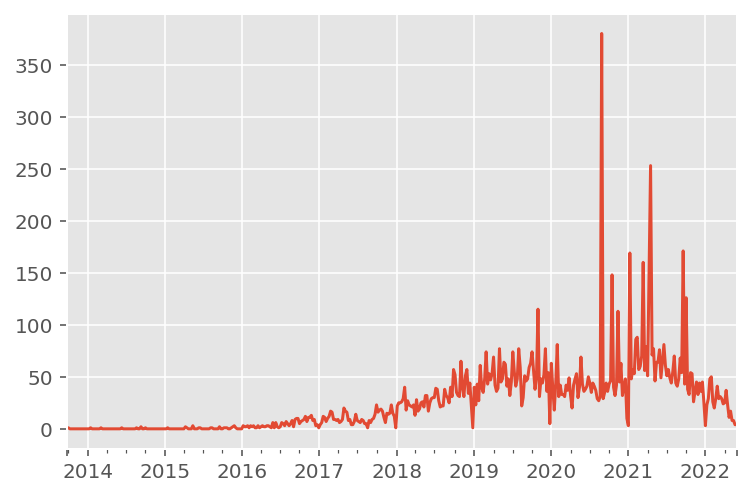

In [81]:
agg_plot_weekly(closed_opps_df['opportunity_created_date'])

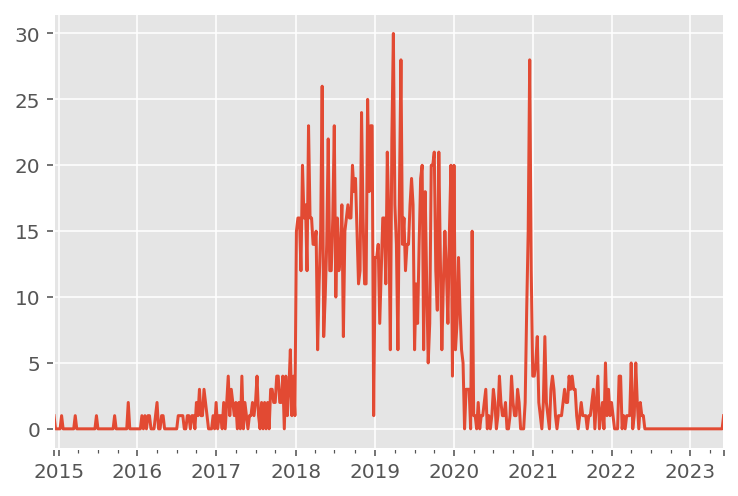

In [82]:
agg_plot_weekly(closed_opps_df['opportunity_contract_signed_date'])

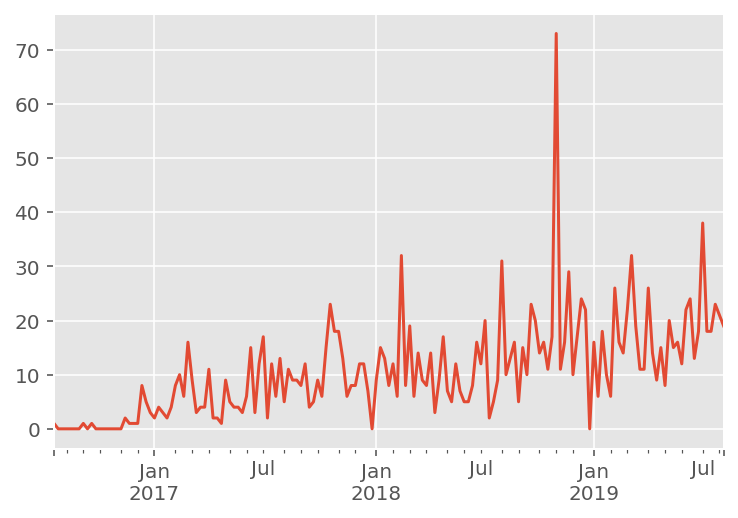

In [83]:
agg_plot_weekly(closed_opps_df['opportunity_closed_lost_date'])

In [84]:
# Conversion rate by month
closed_opps_df['opportunity_created_date'] = pd.to_datetime(closed_opps_df['opportunity_created_date'])
closed_opps_df['MONTH_YEAR'] = closed_opps_df['opportunity_created_date'].to_numpy().astype('datetime64[M]')

/var/folders/vq/hlvrqms16b70m_gc56_xm3040000gn/T/ipykernel_14587/661735948.py:3: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  closed_opps_df['MONTH_YEAR'] = closed_opps_df['opportunity_created_date'].to_numpy().astype('datetime64[M]')


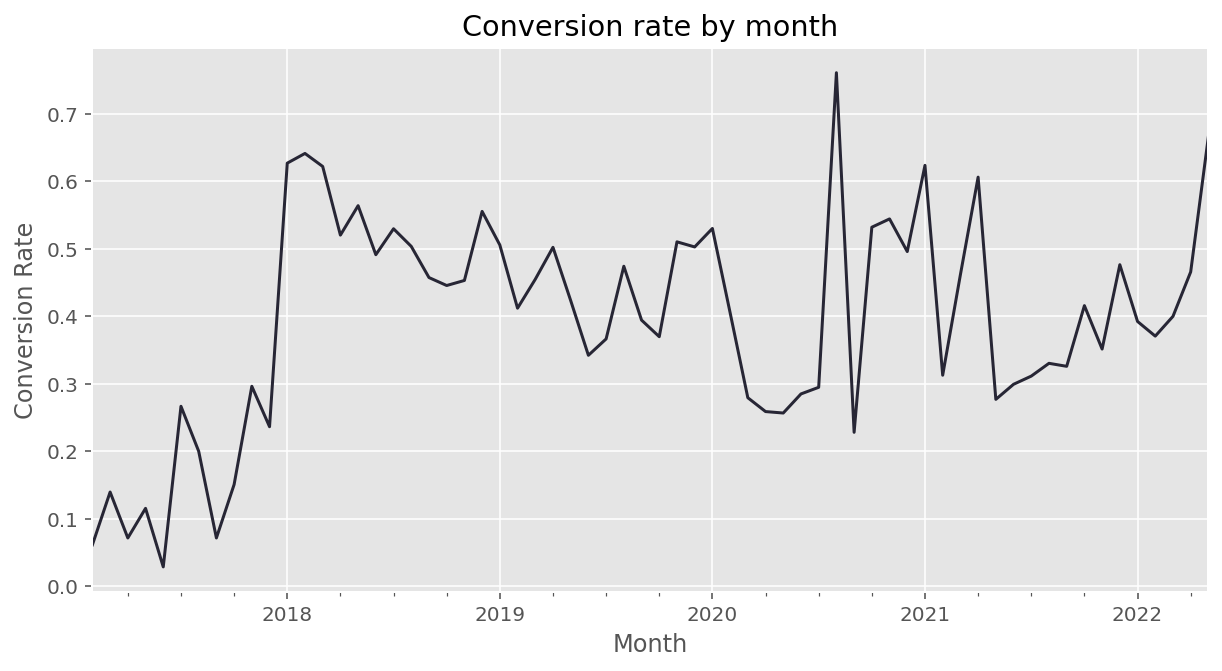

In [85]:
# Plot
fig, ax = plt.subplots(figsize=(10,5))
closed_opps_df[closed_opps_df['MONTH_YEAR'] > '2017-01-01'].groupby('MONTH_YEAR')['closed_won'].mean().resample("M").sum().plot(ax=ax, color="#272635")
ax.set_ylabel("Conversion Rate")
ax.set_xlabel("Month")
plt.title("Conversion rate by month")
plt.show();

### Crosstabs

In [74]:
closed_opps_df['closed_won'] = np.where(closed_opps_df['opportunity_stage_name'] == '7. Closed Won', 1, 0)

In [75]:
target = 'closed_won'
features = ['country', 'vertical', 'annual_revenue_db']

In [76]:
# Overall mean
closed_opps_df[target].mean()

0.42618433916985154

In [77]:
# Top 5 markets
closed_opps_df['country'].value_counts()[:5]

United Kingdom    7853
France            1272
Germany            639
Australia          426
United States      376
Name: country, dtype: int64

In [78]:
closed_opps_df['country5'] = [i if i in closed_opps_df['country'].value_counts()[:5].index else 'other' for i in closed_opps_df['country']]

In [79]:
# Mean by country
closed_opps_df.groupby('country5')[target].agg(['mean', 'size']).sort_values(by='mean', ascending=False)

,mean,size
country5,,
United Kingdom,0.466,7853
France,0.384,1272
other,0.378,685
Germany,0.316,639
Australia,0.282,426
United States,0.170,376


In [80]:
# Mean by vertical
closed_opps_df.groupby('vertical')[target].agg(['mean', 'size']).sort_values(by='mean', ascending=False)

,mean,size
vertical,,
Transportation,0.573,234
Amusement and Recreation,0.550,120
Services,0.521,1536
Education and Training,0.468,340
Nonclassifiable Establishments,0.458,262
Membership Organisations,0.450,342
Materials,0.442,43
Communications and Media,0.439,875
Property,0.438,363


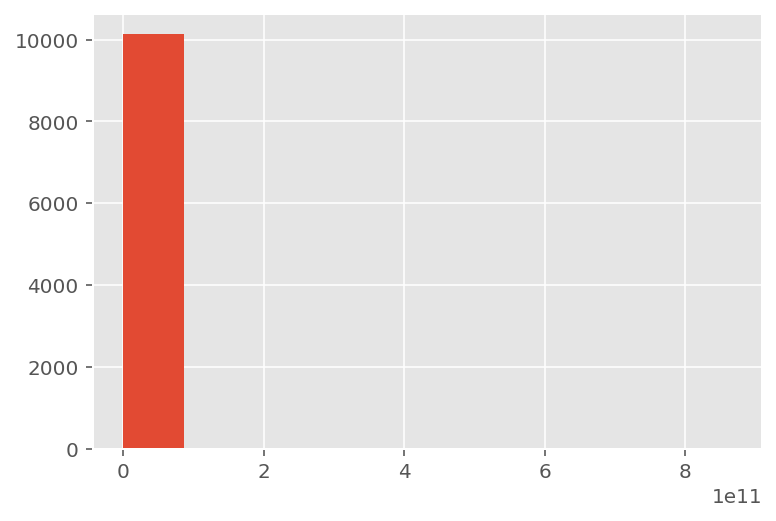

In [82]:
# Revenue
closed_opps_df['annual_revenue_db'].hist();

In [94]:
closed_opps_df = closed_opps_df[(closed_opps_df['annual_revenue_db'] < 1e8) & (closed_opps_df['annual_revenue_db'] > 0)]

In [95]:
closed_opps_df.shape

(9079, 244)

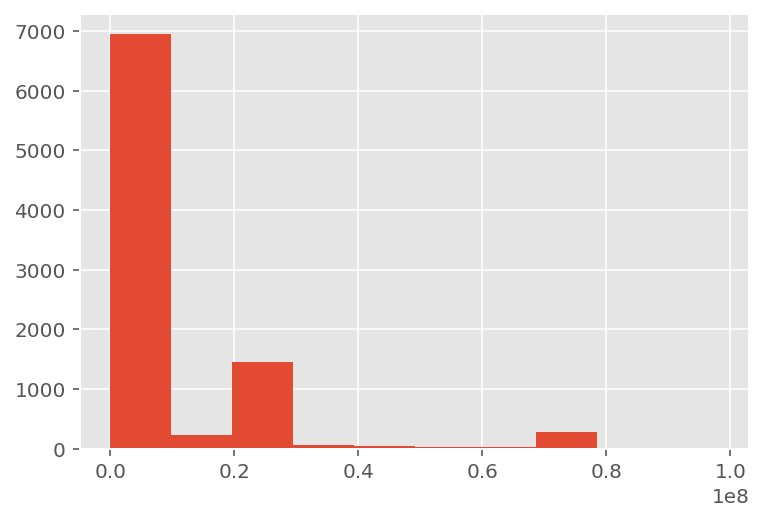

In [96]:
closed_opps_df['annual_revenue_db'].hist();

In [102]:
closed_opps_df['revenue_bins'] = pd.cut(closed_opps_df['annual_revenue_db'], bins=10)

In [103]:
closed_opps_df['revenue_bins'].value_counts()

(-98143.406, 9814643.6]     6941
(19629284.2, 29443924.8]    1452
(68702487.2, 78517127.8]     281
(9814643.6, 19629284.2]      224
(29443924.8, 39258565.4]      68
(39258565.4, 49073206.0]      39
(49073206.0, 58887846.6]      28
(58887846.6, 68702487.2]      23
(78517127.8, 88331768.4]      17
(88331768.4, 98146409.0]       6
Name: revenue_bins, dtype: int64